In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('/content/diabetes_data.csv')
data.head(3)

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
data.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

In [6]:
pregnancies = data['Pregnancies'].value_counts()

In [7]:
glucose = data['Glucose'].value_counts()

In [8]:
 blood = data['BloodPressure'].value_counts()

In [9]:
insulin = data['Insulin'].value_counts()

In [10]:
bmi = data['BMI'].value_counts()


In [11]:
diabities = data['DiabetesPedigreeFunction'].value_counts()


In [12]:
age = data['Age'].value_counts()

In [13]:
# Replacing 0 with mean
data['SkinThickness'].replace(0, data['SkinThickness'].mean(), inplace=True)

/tmp/ipython-input-13-1582941412.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['SkinThickness'].replace(0, data['SkinThickness'].mean(), inplace=True)


In [14]:
data['SkinThickness'].value_counts()

SkinThickness
20.536458    227
32.000000     31
30.000000     27
27.000000     23
23.000000     22
18.000000     20
33.000000     20
28.000000     20
31.000000     19
39.000000     18
19.000000     18
29.000000     17
25.000000     16
40.000000     16
22.000000     16
37.000000     16
26.000000     16
41.000000     15
35.000000     15
36.000000     14
15.000000     14
17.000000     14
20.000000     13
24.000000     12
42.000000     11
13.000000     11
21.000000     10
46.000000      8
34.000000      8
12.000000      7
38.000000      7
16.000000      6
11.000000      6
45.000000      6
14.000000      6
43.000000      6
44.000000      5
10.000000      5
47.000000      4
48.000000      4
49.000000      3
50.000000      3
54.000000      2
8.000000       2
52.000000      2
7.000000       2
60.000000      1
51.000000      1
56.000000      1
63.000000      1
99.000000      1
Name: count, dtype: int64

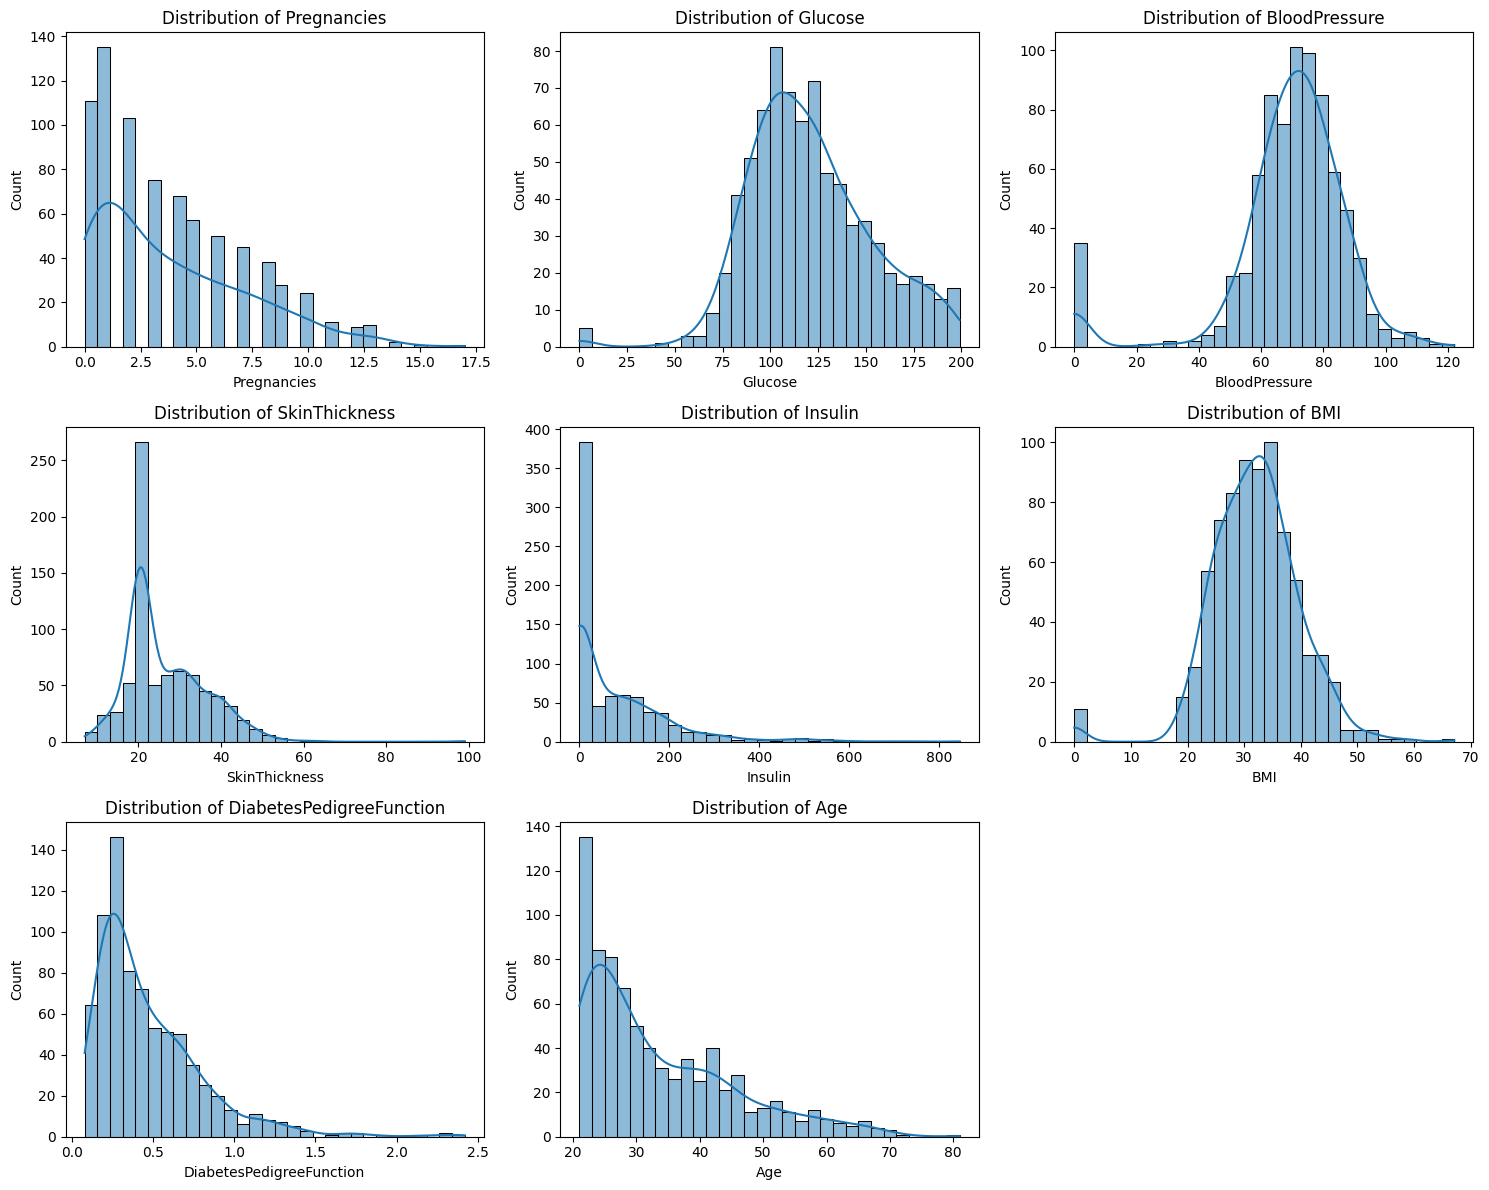

In [15]:
# Plot distribution for all numeric features
plt.figure(figsize=(15, 12))
for i, column in enumerate(data.columns[:-1], 1):
    plt.subplot(3, 3, i)
    sns.histplot(data[column], kde=True, bins=30)
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()

<Axes: >

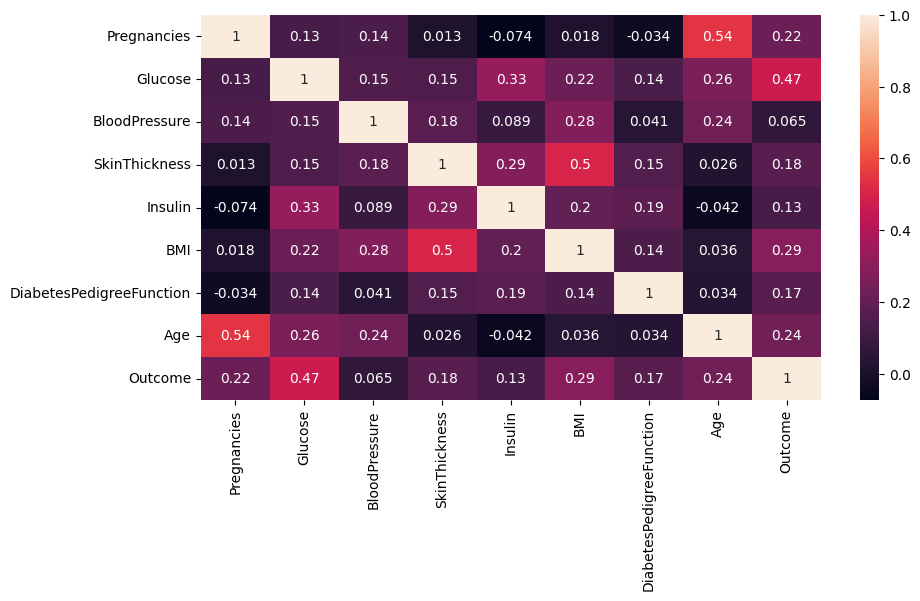

In [16]:
### Corelation of all the features with each other

plt.figure(figsize=(10,5))
sns.heatmap(data.corr(), annot=True)

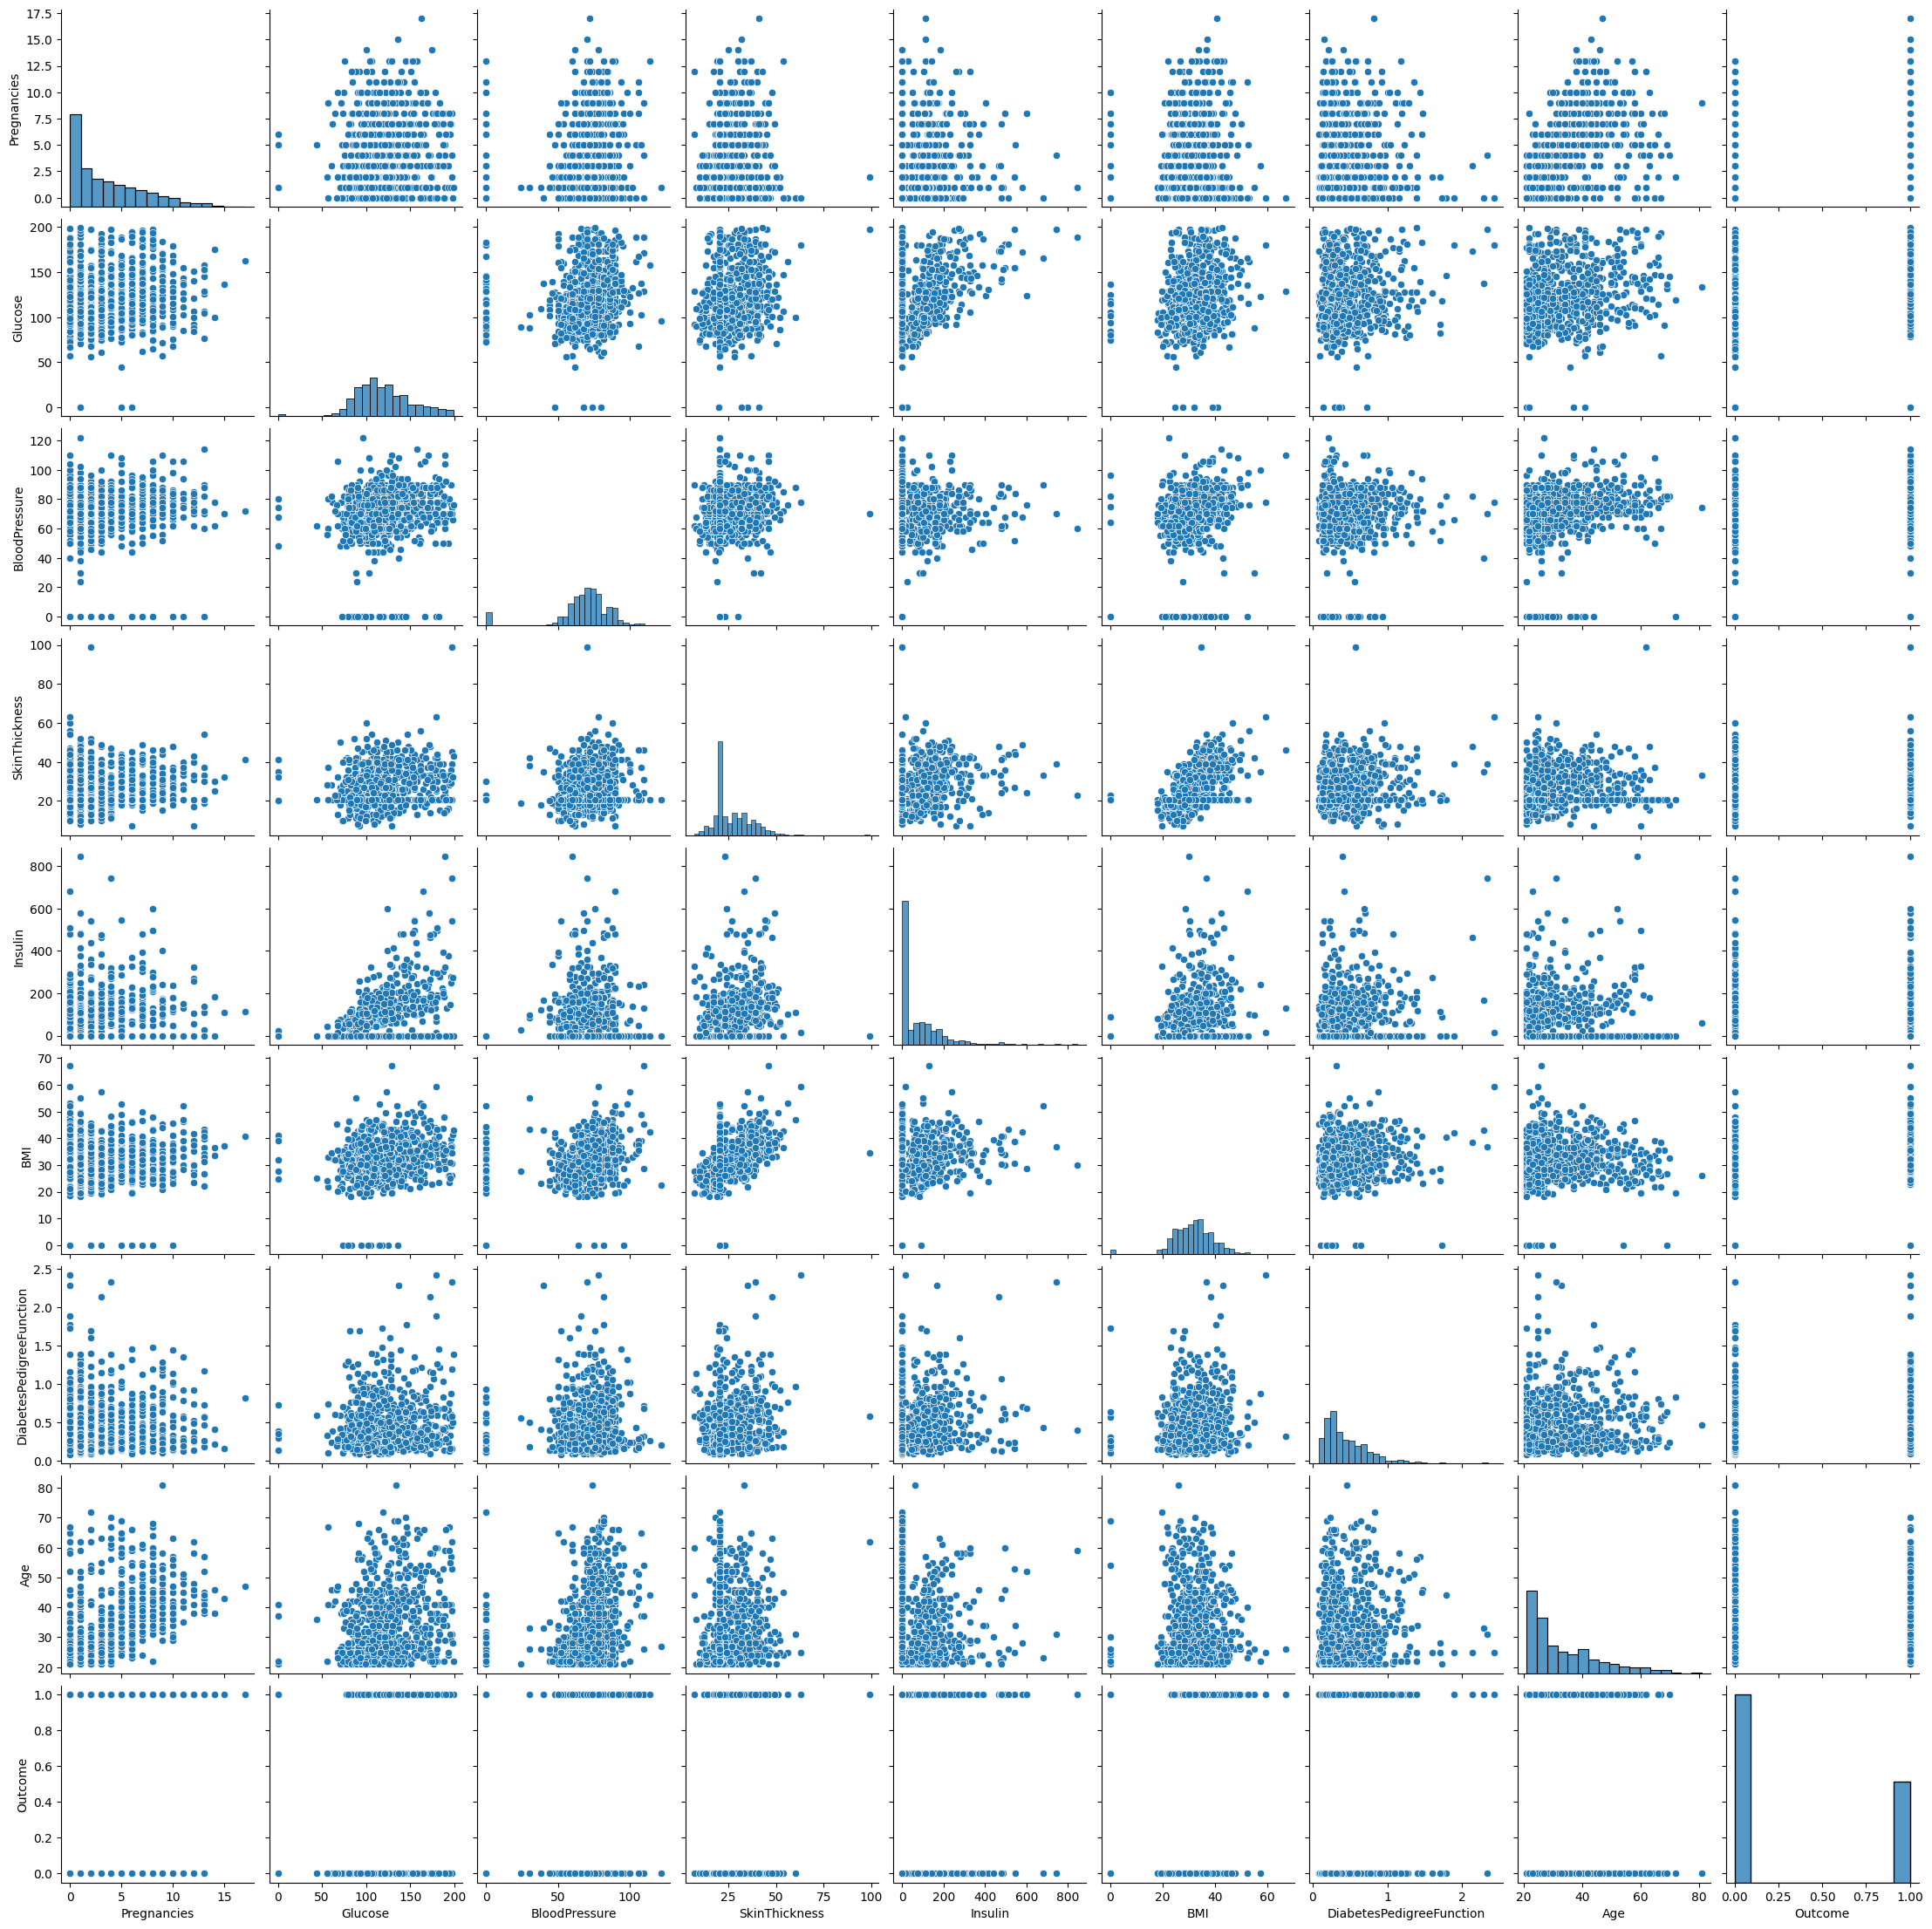

In [17]:
# Using seaborn's pairplot to visualize relationships between all features and target variable
sns.pairplot(data)
plt.show()

In [18]:
features = data.columns

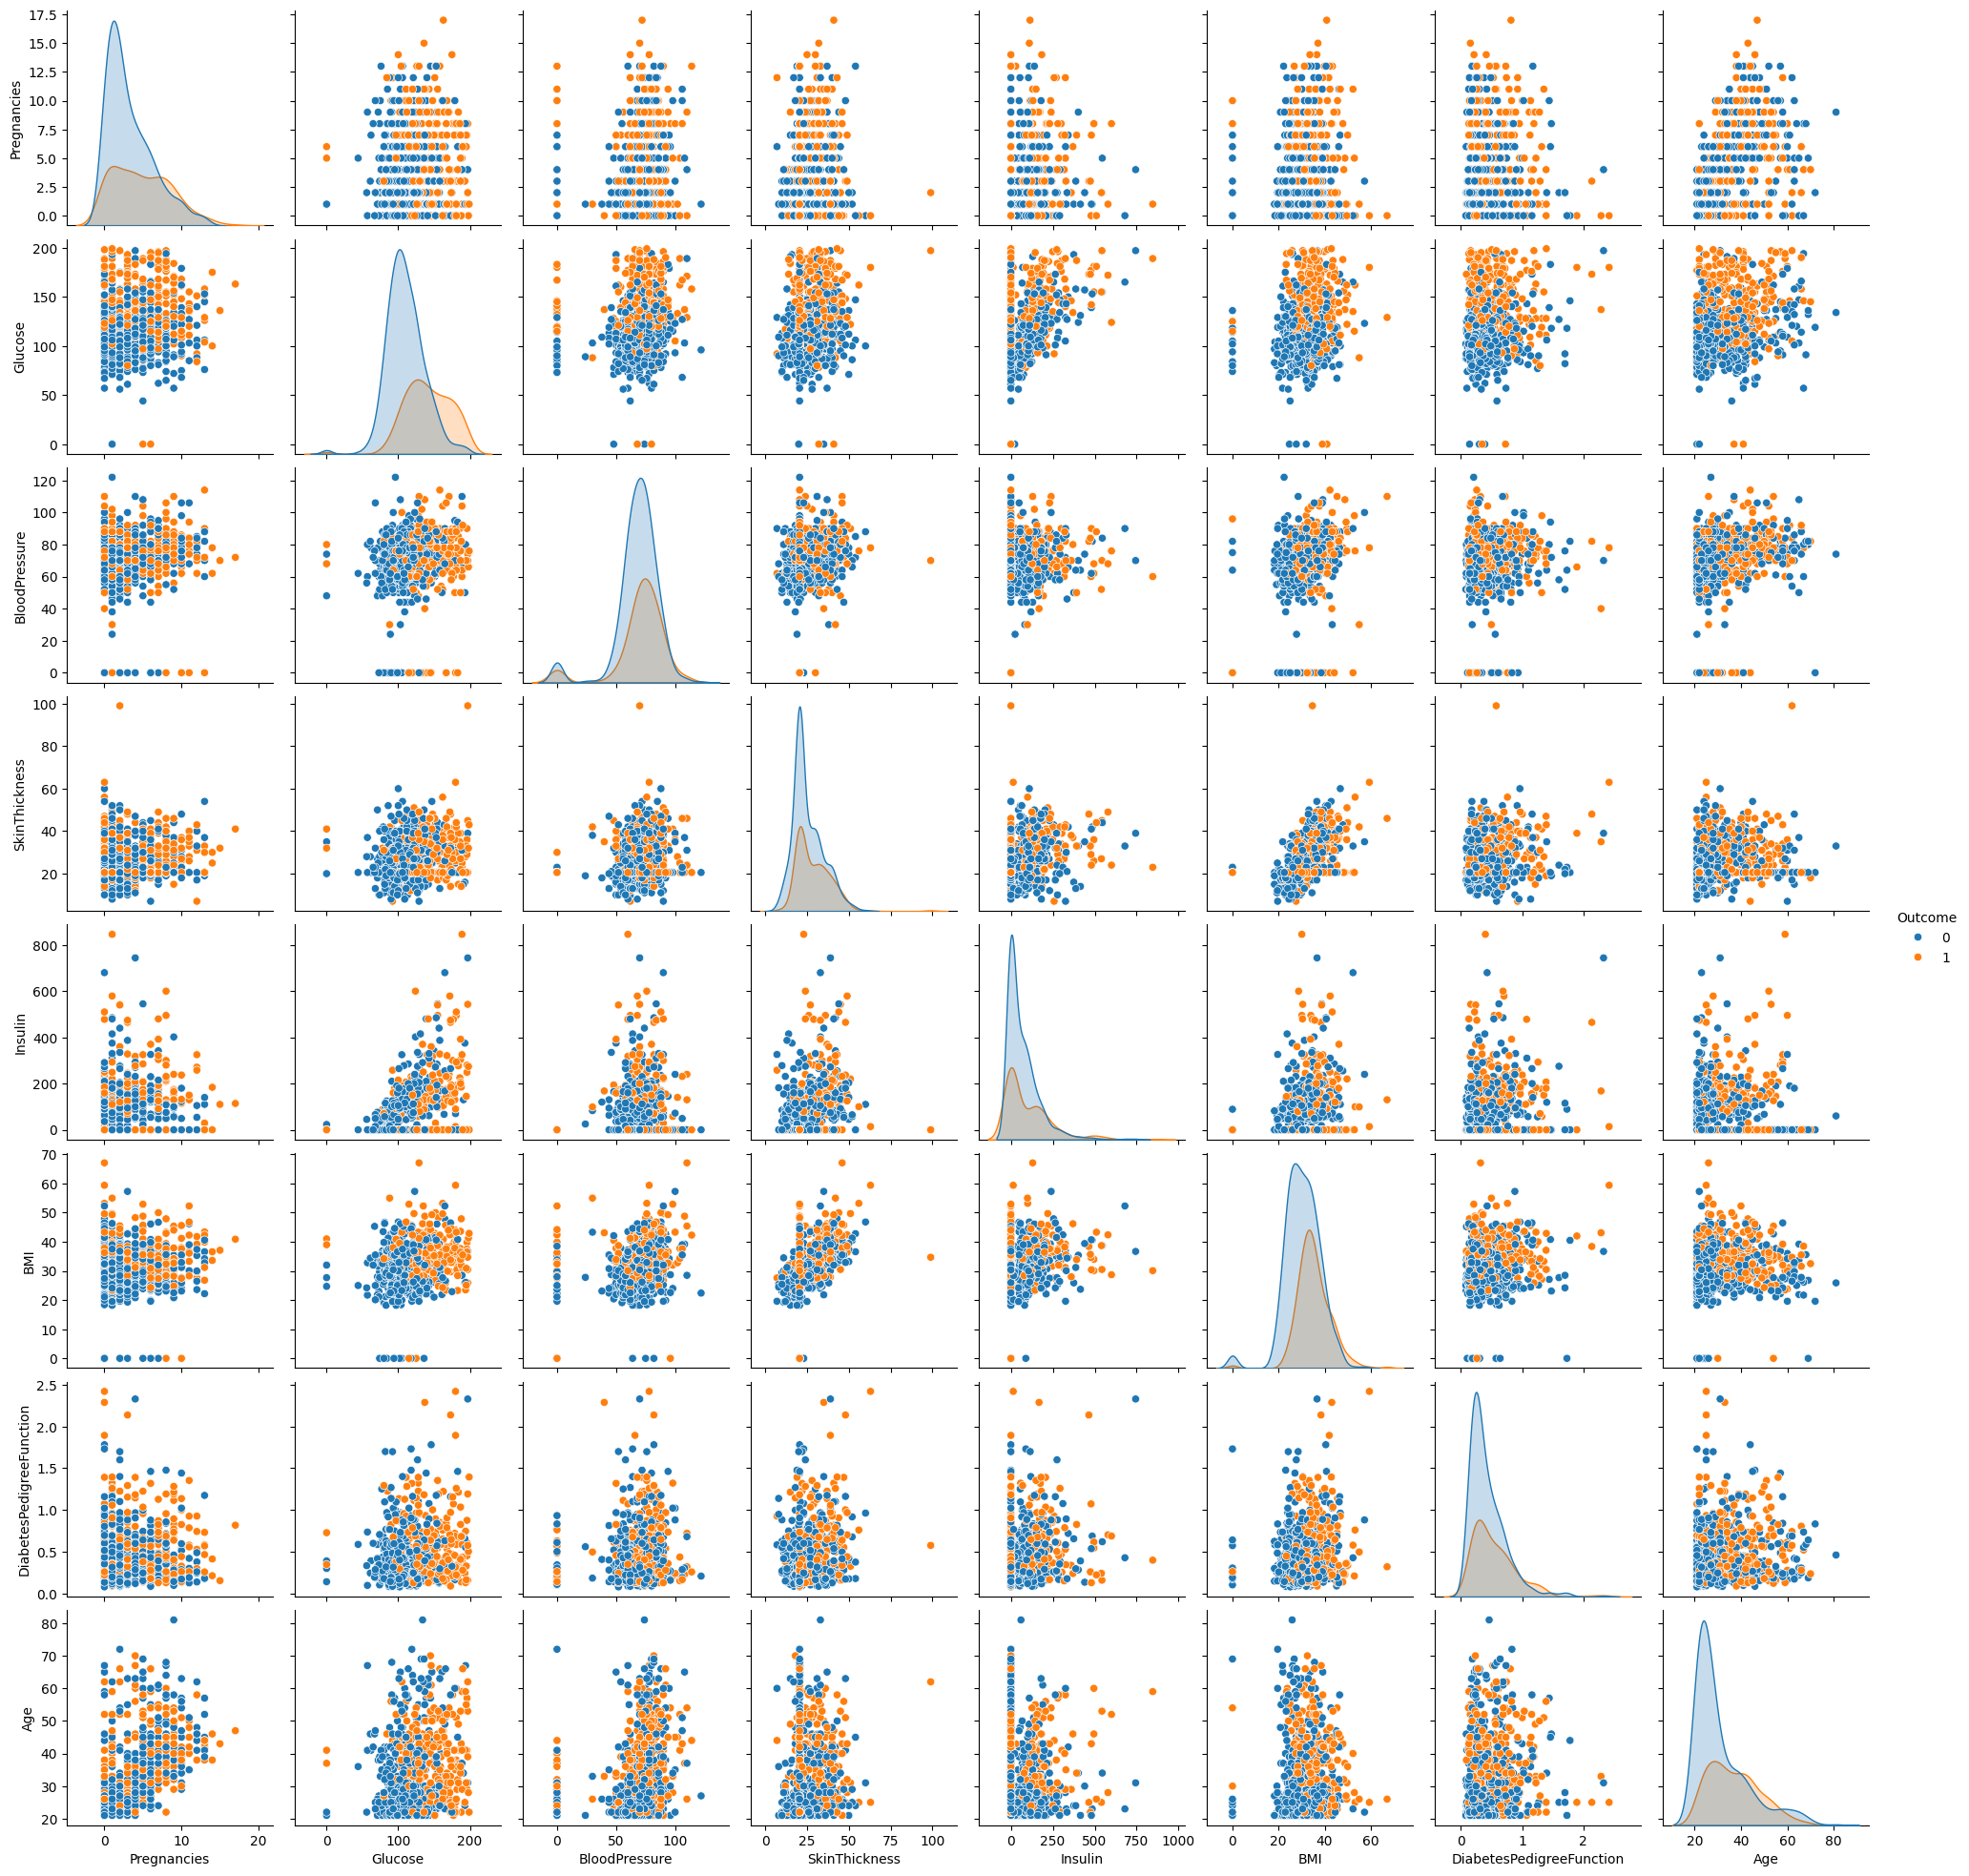

In [19]:
# Plot pairwise relationships between features and target variable
sns.pairplot(data, vars=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'], hue='Outcome')
plt.show()


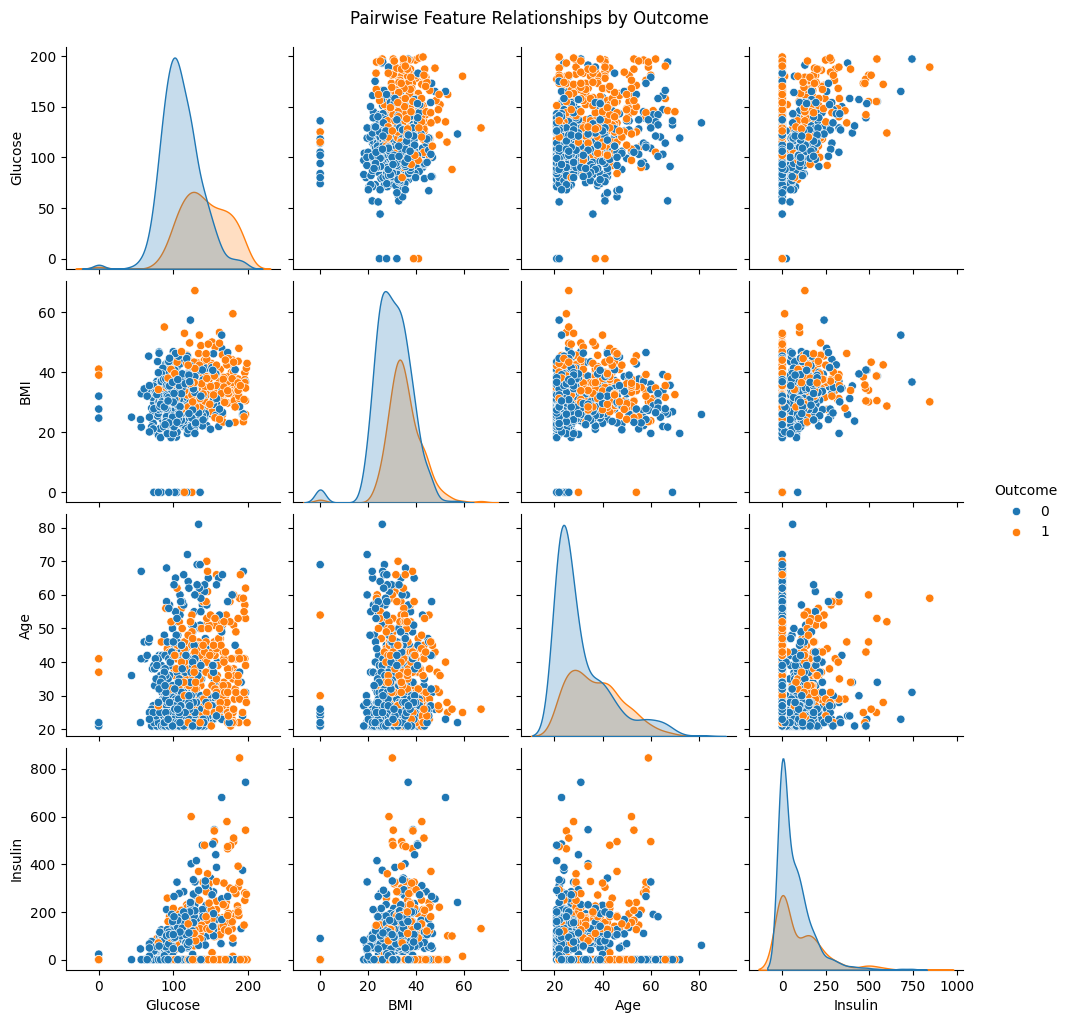

In [20]:
sns.pairplot(data, hue='Outcome', vars=['Glucose', 'BMI', 'Age', 'Insulin'])
plt.suptitle('Pairwise Feature Relationships by Outcome', y=1.02)
plt.show()


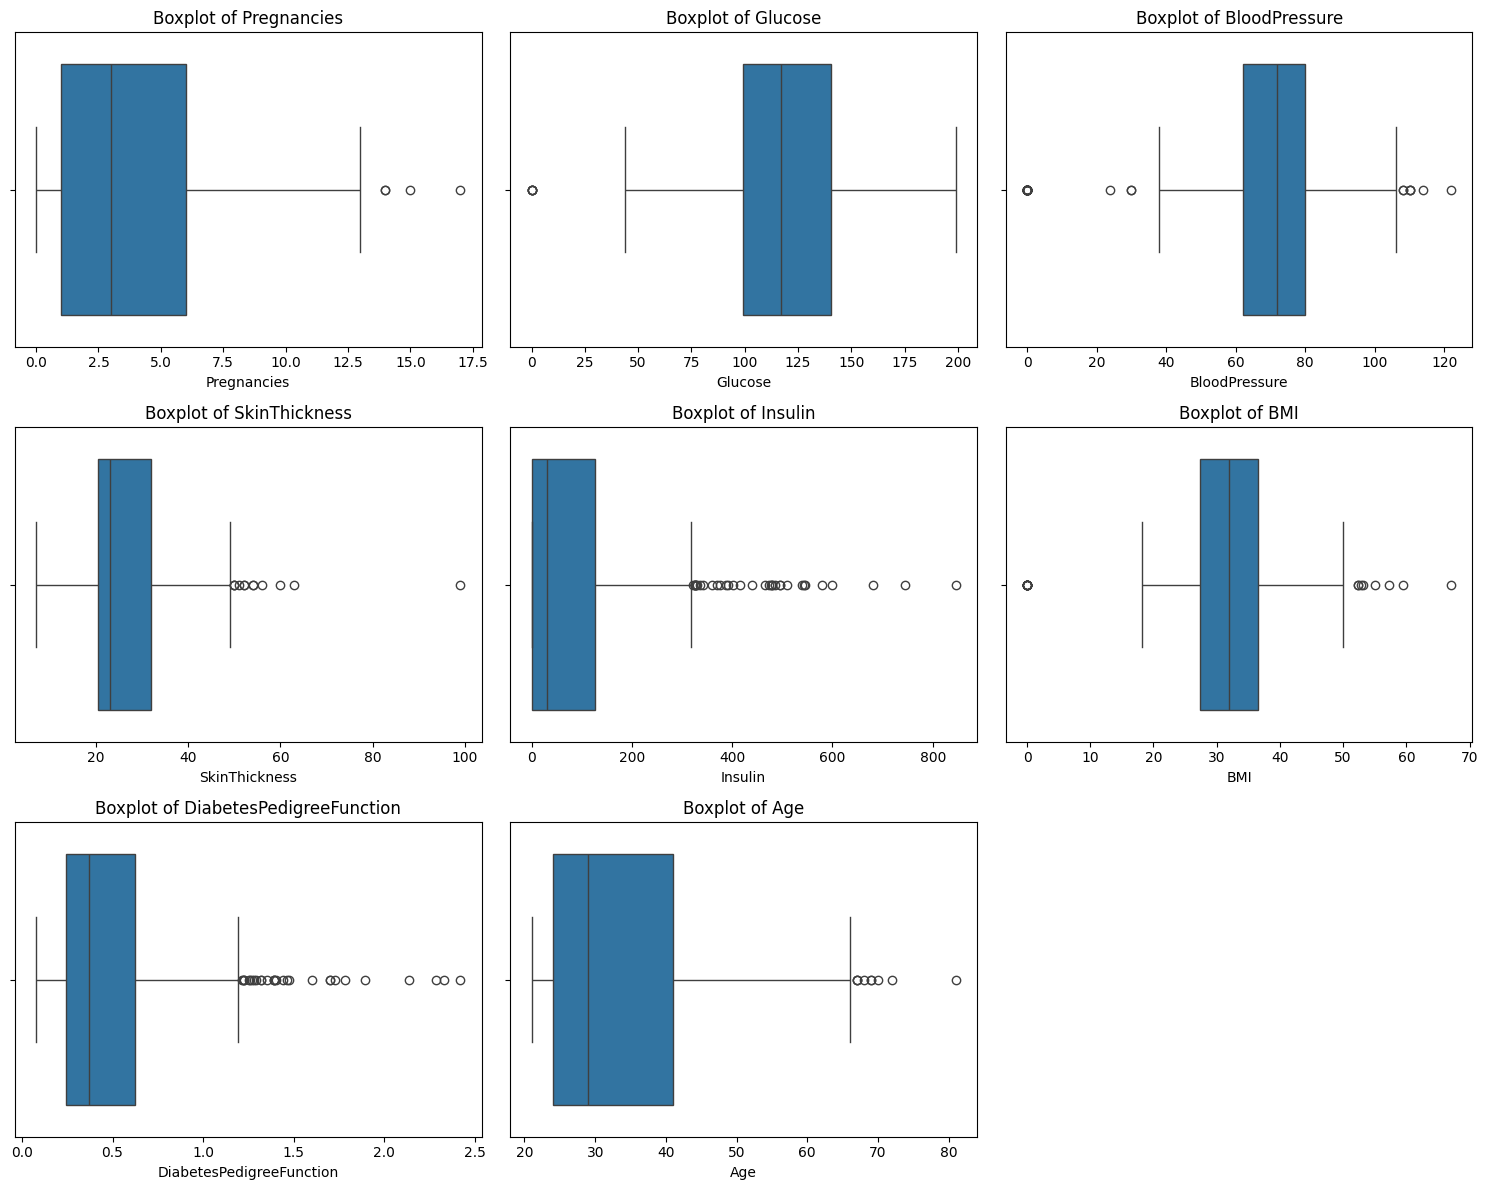

In [21]:
### Box-Plot to detect the outliers in the dataset

plt.figure(figsize=(15, 12))
for i, column in enumerate(data.columns[:-1], 1):
    plt.subplot(3, 3, i)
    sns.boxplot(data=data, x=column)
    plt.title(f'Boxplot of {column}')
plt.tight_layout()
plt.show()

In [22]:
# Applying IQR method to detect the outliers : -

def detect_outliers_iqr(df):
    outlier_info = {}
    for column in df.columns[:-1]:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]

        outlier_info[column] = {
            'Lower Bound': lower_bound,
            'Upper Bound': upper_bound,
            'Outlier Count': outliers.shape[0],
            'Outlier Indices': outliers.index.tolist()
        }
    return outlier_info

# Example usage
outliers = detect_outliers_iqr(data)

# To view the outlier counts per column
for column, details in outliers.items():
    print(f"{column}: {details['Outlier Count']} outliers")


Pregnancies: 4 outliers
Glucose: 5 outliers
BloodPressure: 45 outliers
SkinThickness: 12 outliers
Insulin: 34 outliers
BMI: 19 outliers
DiabetesPedigreeFunction: 29 outliers
Age: 9 outliers


In [23]:
# Replacing the Outliers with Mean :-

def replace_outliers_with_mean(df):
    for column in df.columns[:-1]:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        mean = data[column].mean()
        data[column] = data[column].apply(lambda x : mean if (x < lower_bound or x > upper_bound) else x)
    return df


data = replace_outliers_with_mean(data)


In [24]:
for column in data.columns:
  Q1 = data[column].quantile(0.25)
  Q3 = data[column].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
  print(f"{column}: {outliers.shape[0]} outliers")

Pregnancies: 0 outliers
Glucose: 0 outliers
BloodPressure: 4 outliers
SkinThickness: 0 outliers
Insulin: 13 outliers
BMI: 3 outliers
DiabetesPedigreeFunction: 15 outliers
Age: 7 outliers
Outcome: 0 outliers


In [25]:
# Replacing the Outliers with Median : -

def replace_outliers_with_median(df):
    for column in df.columns[:-1]:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        median = data[column].median()
        data[column] = data[column].apply(lambda x : median if (x < lower_bound or x > upper_bound) else x)
    return df


data = replace_outliers_with_median(data)

In [26]:
for column in data.columns:
  Q1 = data[column].quantile(0.25)
  Q3 = data[column].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
  print(f"{column}: {outliers.shape[0]} outliers")

Pregnancies: 0 outliers
Glucose: 0 outliers
BloodPressure: 0 outliers
SkinThickness: 0 outliers
Insulin: 7 outliers
BMI: 1 outliers
DiabetesPedigreeFunction: 4 outliers
Age: 9 outliers
Outcome: 0 outliers


In [27]:
# Replacing the Outliers with Mode :-

def replace_outliers_with_mode(df):
    columns_to_convert = ['Insulin', 'BMI', 'DiabetesPedigreeFunction']
    for col in columns_to_convert:
        df[col] = pd.to_numeric(df[col], errors='coerce')

    for column in df.columns[:-1]:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        mode = df[column].mode()[0] # Access the first mode value
        # Use boolean indexing to replace outliers
        df.loc[(df[column] < lower_bound) | (df[column] > upper_bound), column] = mode
    return df


data = replace_outliers_with_mode(data)

In [28]:
for column in data.columns:
  Q1 = data[column].quantile(0.25)
  Q3 = data[column].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
  print(f"{column}: {outliers.shape[0]} outliers")

Pregnancies: 0 outliers
Glucose: 0 outliers
BloodPressure: 0 outliers
SkinThickness: 0 outliers
Insulin: 2 outliers
BMI: 0 outliers
DiabetesPedigreeFunction: 2 outliers
Age: 0 outliers
Outcome: 0 outliers


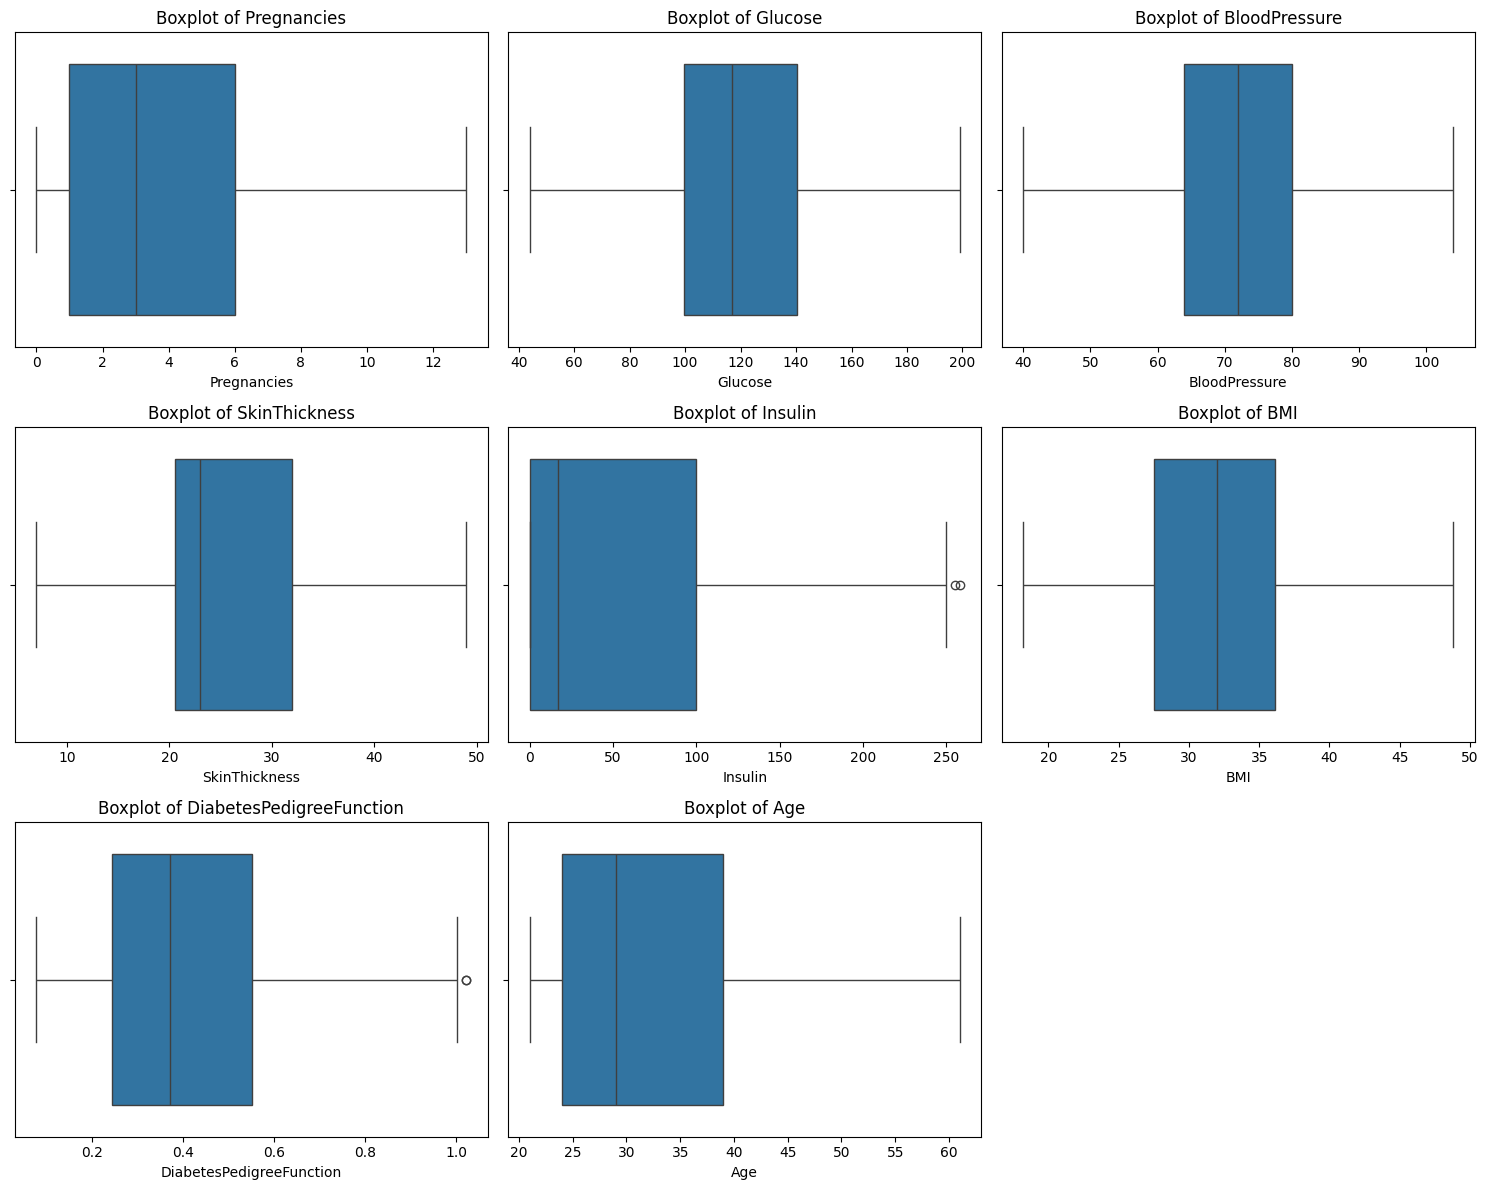

In [29]:
# Checking the dataset after replacing the Outliers with Mean, median & Mode using Box-plot :-

plt.figure(figsize=(15, 12))
for i, column in enumerate(data.columns[:-1], 1):
    plt.subplot(3, 3, i)
    sns.boxplot(data=data, x=column)
    plt.title(f'Boxplot of {column}')
plt.tight_layout()
plt.show()


In [30]:
# Apply StandardScalar to the dataset to scale the data :-

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(data.drop('Outcome', axis=1))

In [31]:
scaled_data

array([[ 6.77181371e-01,  8.65275745e-01,  5.64999028e-03, ...,
         2.37738504e-01,  9.78316724e-01,  1.77783681e+00],
       [-8.52794025e-01, -1.20598931e+00, -5.45313036e-01, ...,
        -8.76788584e-01, -2.85132009e-01, -9.87915139e-02],
       [ 1.28917153e+00,  2.01597855e+00, -7.28967379e-01, ...,
        -1.40220850e+00,  1.18431380e+00, -2.16018993e-05],
       ...,
       [ 3.71186292e-01, -2.24092804e-02,  5.64999028e-03, ...,
        -9.40475846e-01, -7.70369566e-01, -1.97561426e-01],
       [-8.52794025e-01,  1.41976835e-01, -1.09627606e+00, ...,
        -3.19525040e-01, -2.94287435e-01,  1.48152708e+00],
       [-8.52794025e-01, -9.42971529e-01, -1.78004352e-01, ...,
        -2.71759593e-01, -4.49929670e-01, -8.88950810e-01]])

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
import xgboost as xgb
from sklearn.ensemble import GradientBoostingRegressor



In [33]:
X = pd.DataFrame(scaled_data, columns=data.columns[:-1])
Y = data['Outcome']

In [34]:
# Splitting the dataset into Train Test split ; -

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [35]:
# Define models : -

models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestRegressor(),
    'Support Vector Machine': SVR(),
    'K-Nearest Neighbors': KNeighborsRegressor(),
    'Decision Tree': DecisionTreeRegressor(),
    'AdaBoost': AdaBoostRegressor(),
    'XGBoost': xgb.XGBRegressor(),
    'Gradient Boosting': GradientBoostingRegressor()
}



In [36]:
from sklearn.impute import SimpleImputer

# Train & evaluate models :-

# Impute missing values using the mean of the training data
imputer = SimpleImputer(strategy='mean')
x_train_imputed = imputer.fit_transform(x_train)
x_test_imputed = imputer.transform(x_test)


best_model = None
best_r2_score = -float('inf')
for name, model in models.items():
    model.fit(x_train_imputed, y_train)
    y_pred = model.predict(x_test_imputed)
    r2_score = model.score(x_test_imputed, y_test)
    print(f"{name}: R2 Score = {r2_score}")
    if r2_score > best_r2_score:
        best_r2_score = r2_score
        best_model = model

print(f"Best Model: {best_model}")



Logistic Regression: R2 Score = 0.7532467532467533
Random Forest: R2 Score = 0.2839721212121211
Support Vector Machine: R2 Score = 0.14396426074213442
K-Nearest Neighbors: R2 Score = 0.15490909090909055
Decision Tree: R2 Score = -0.21616161616161644
AdaBoost: R2 Score = 0.20821103547879494
XGBoost: R2 Score = 0.0968429446220398
Gradient Boosting: R2 Score = 0.1686624725171677
Best Model: LogisticRegression()


In [37]:
# Save the model :-

import pickle

with open('best_model.pkl', 'wb') as f:
    pickle.dump(best_model, f)

In [39]:
print(f"Best model: {type(best_model).__name__}, r2: {best_r2_score:.3f}")

Best model: LogisticRegression, r2: 0.753


In [41]:
# Loaded the save model :-

with open('best_model.pkl', 'rb') as f:
    loaded_model = pickle.load(f)

In [42]:
# make predictions on new data :-
best_model.predict(x_test)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


array([0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0])

In [43]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [49]:
!pip install streamlit -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 51.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 62.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 4.8 MB/s eta 0:00:00


In [50]:
import streamlit as st

In [51]:
!wget -q -O - ipv4.icanhazip.com

35.201.198.206


In [ ]:
! streamlit run streamlit_app.py.py & npx localtunnel --port 8501

⠙⠹⠸

⠼⠴⠦⠧⠇⠏
  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://35.201.198.206:8501

your url is: https://tiny-kids-hunt.loca.lt
────────────────────────── Traceback (most recent call last) ───────────────────────────
  /usr/local/lib/python3.11/dist-packages/streamlit/runtime/scriptrunner/exec_code.py:  
  128 in exec_func_with_error_handling                                                  
                                                                                        
  /usr/local/lib/python3.11/dist-packages/streamlit/runtime/scriptrunner/script_runner  
  .py:669 in code_to_exec                                                               
                                                                                        
  /content/streamlit_app.py.py:21 in <module>                                           
                                                          